# **Employee Attrition**

# 1. Problem Statement
High employee attrition is a significant challenge for organizations, leading to increased recruitment costs, loss of institutional knowledge, and decreased morale. This project performs Exploratory Data Analysis (EDA) on HR data to identify the primary factors driving employees to leave and to provide data-driven recommendations for improving retention

# 2. Project Objectives
* Understand the distribution of employee demographics and professional backgrounds.
* Perform data cleaning and wrangling to ensure data quality.
* Conduct univariate, bivariate, and multivariate analyses to find correlations between features and attrition.
* Identify high-risk groups (e.g., specific job roles or income levels).
Provide actionable insights for HR management

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Load data**

In [3]:
data = pd.read_csv('Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# 3. Data description

Age → Age of the employee in years.

Attrition → Indicates whether the employee left the company (Yes) or stayed (No).

BusinessTravel → Frequency of work-related travel (Non-Travel, Travel Rarely, Travel Frequently).

DailyRate → Daily salary rate of the employee.

Department → Department in which the employee works (Sales, Research & Development, Human Resources).

DistanceFromHome → Distance between employee’s home and workplace.

Education → Education level of the employee represented on a numerical scale.

EducationField → Field of education or specialization of the employee.

EmployeeCount → Number of employees (constant value, mostly equal to 1).

EmployeeNumber → Unique identification number assigned to each employee.

EnvironmentSatisfaction → Employee satisfaction with the work environment (rating scale).

Gender → Gender of the employee.

HourlyRate → Hourly wage rate of the employee.

JobInvolvement → Level of employee involvement in their job.

JobLevel → Seniority level or hierarchy level of the job role.

JobRole → Specific role or position of the employee in the organization.

JobSatisfaction → Level of satisfaction an employee has with their job.

MaritalStatus → Marital status of the employee (Single, Married, Divorced).

MonthlyIncome → Monthly salary earned by the employee.

MonthlyRate → Monthly rate associated with the employee.

NumCompaniesWorked → Total number of companies the employee has worked for previously.

Over18 → Indicates whether the employee is over 18 years old.

OverTime → Indicates whether the employee works overtime (Yes/No).

PercentSalaryHike → Percentage increase in salary during the last appraisal.

PerformanceRating → Employee performance evaluation rating.

RelationshipSatisfaction → Satisfaction level with workplace relationships.

StandardHours → Standard working hours (constant value for all employees).

StockOptionLevel → Level of stock options granted to the employee.

TotalWorkingYears → Total number of years of professional work experience.

TrainingTimesLastYear → Number of training sessions attended in the previous year.

WorkLifeBalance → Employee’s work-life balance rating.

YearsAtCompany → Number of years the employee has worked at the company.

YearsInCurrentRole → Number of years spent in the current job role.

YearsSinceLastPromotion → Number of years since the employee’s last promotion.

YearsWithCurrManager → Number of years working with the current manager.

In [4]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## **Basic Checks**

In [5]:
data.shape

(1470, 35)

In [6]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
num_data = data.select_dtypes(include=['int64','float64'])
num_data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [11]:
cat_data = data.select_dtypes(include='object')
cat_data

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [12]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
df =data[['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
for x in df:
  print(f"{x}-->{df[x].unique()}")
  print()

Age-->[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]

Attrition-->['Yes' 'No']

BusinessTravel-->['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

DailyRate-->[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  19

In [14]:
for x in df:
  print(df[x].value_counts())
  print()

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6     

## **Data Cleaning**

In [15]:
data.duplicated().sum()

0

no duplicates found in the dataset

In [16]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**There is no missing values in the dataset**

### **1) What is the count of attrition**

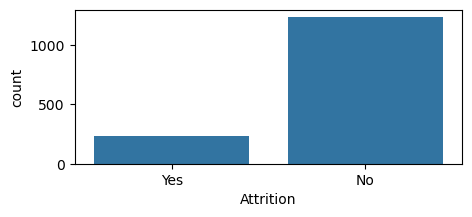

In [17]:
plt.figure(figsize=(5,2))
sns.countplot(data,x='Attrition')
plt.show()

### Insight

*   employee retension: A large proportion of employees are continuing the work indicates that, employees are happy with job.
*   employee Attrition : A significant amount of employees leave job indicates that company should work identifying the issue and resolving them.
*   Overall most of the employees are happy with their jobs but few had left company. Company should work on addressing the issues to reduce Attrition rate .


### **2) Find percentage of employee attrition**

<Axes: ylabel='count'>

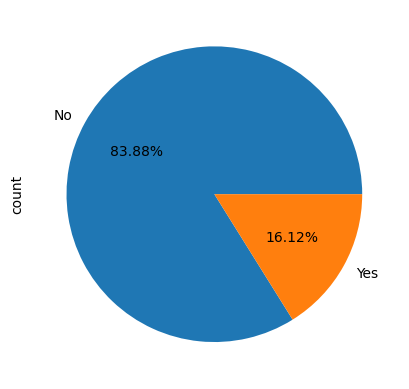

In [18]:
data.loc[:,'Attrition'].value_counts().plot.pie(autopct='%1.2f%%')

### Insight
*   Almost 83.88% of the employees are satisfied in their job
*   16.12% of the employees are not happy with their job this tends to them leaving the company



### **3) What is the proportion of Employees working in different department**

<Axes: ylabel='count'>

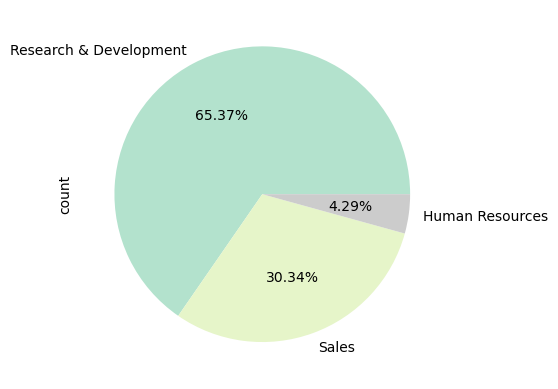

In [19]:
data.loc[:,'Department'].value_counts().plot.pie(autopct='%1.2f%%',colormap='Pastel2')

### Insight

1.   Almost 65% of employees belong to research and development department

1.   30% of employees work in sales department
2.   4% of employees work in HR department






### **4) how many percentage of pepole are satisfied ny their jobs**

<Axes: ylabel='count'>

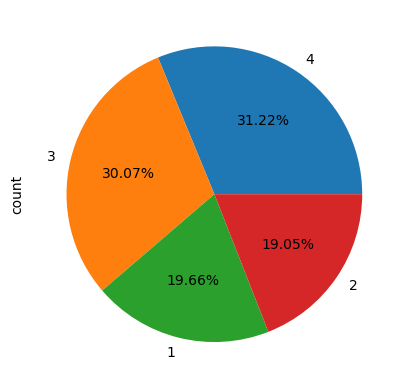

In [20]:
data.loc[:,'JobSatisfaction'].value_counts().plot.pie(autopct='%1.2f%%')

### Insight
1 --> Low Job Satisfaction
(Employee is unhappy or dissatisfied with their job)

2 --> Medium Job Satisfaction
(Employee has below-average satisfaction)

3 --> High Job Satisfaction
(Employee is generally satisfied with their job)

4 --> Very High Job Satisfaction
(Employee is highly satisfied and comfortable with their job)

### **5) What percentage of male and female employees**

<Axes: ylabel='count'>

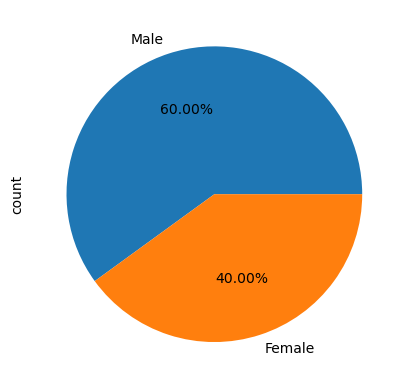

In [21]:
data.loc[:,'Gender'].value_counts().plot.pie(autopct='%1.2f%%')

### Insight

1.   almost 60% of the employees are male
2.   40% of the employees are female



### **6) what percent of employees are married**

<Axes: ylabel='count'>

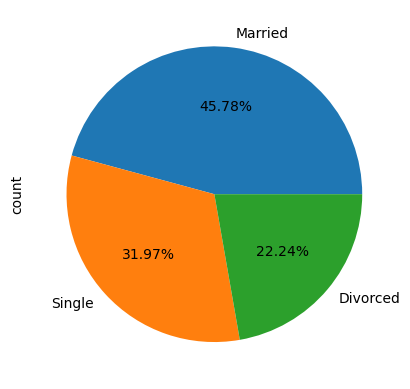

In [22]:
data.loc[:,'MaritalStatus'].value_counts().plot.pie(autopct='%1.2f%%')

### Insight

1.   45.5% of the employees are married
2.   31.9% of employees are single


1.   22.24% of employees are divorced






### **7) Does the monthly income affect attrition**

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

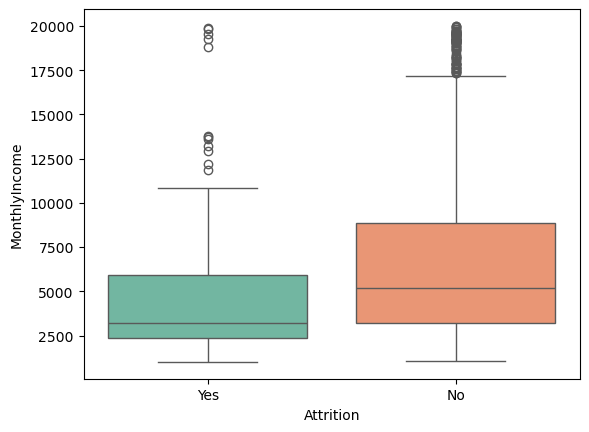

In [23]:
sns.boxplot(data,x='Attrition', y='MonthlyIncome',hue='Attrition', palette='Set2')

### Insight
* employees whose monthly income is less than 5000 is likely to leave the company
* employees whose monthly income is more than 5000 is more likely stays in the company
* whereas the employees earning more than than 10000 rarely leave the company

### **8)  Does the gender distribution and does it impact attrition?**

<Axes: xlabel='Gender', ylabel='count'>

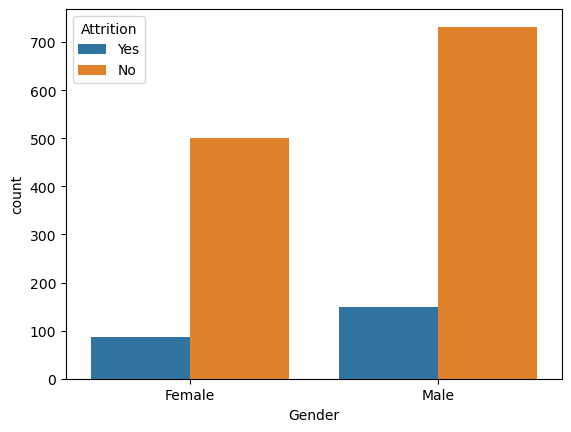

In [24]:
sns.countplot(data,x='Gender', hue='Attrition',)

### Insight
**The company has more males than females. While the  number of males leaving is high, but the proportion of attrition is relatively similar across genders.**

### **9) Does working OverTime lead to higher Attrition**

<Axes: xlabel='OverTime', ylabel='count'>

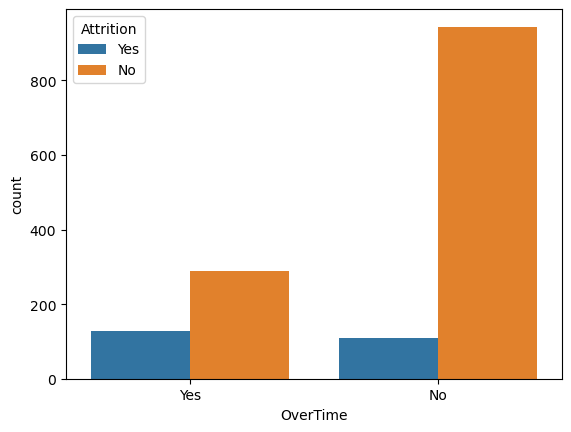

In [25]:
sns.countplot(data, x='OverTime', hue='Attrition',)

### Insight
**Employees who work overtime have a drastically higher attrition rate compared to those who do not.**

### **10)  Does a long distance from home influence the Attrition**

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

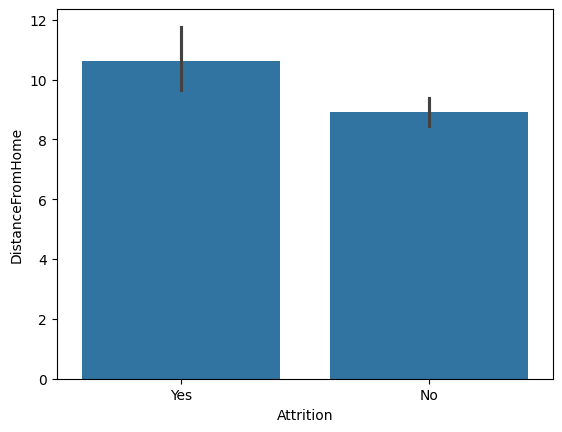

In [ ]:
sns.barplot(x='Attrition', y='DistanceFromHome', data=df)

### Insight

**Employees living further away (above 10-15 kms) show a higher tendency to leave, likely due to commute stress and poor work-life balance.**

### **11)Does a poor work-life balance drive employees away?**

/tmp/ipython-input-1515734694.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(data=data.replace({'Yes':1, 'No':0}),x='WorkLifeBalance', y='Attrition')


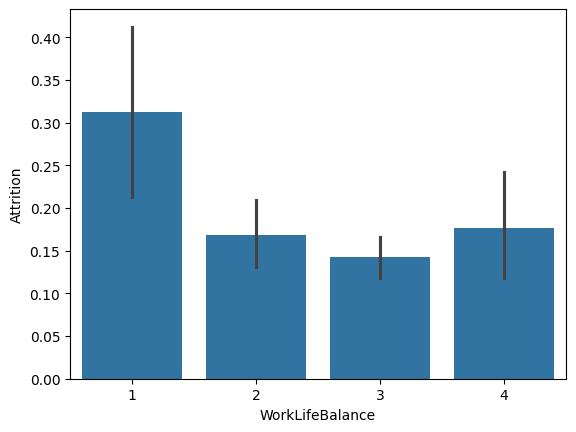

In [ ]:
sns.barplot(data=data.replace({'Yes':1, 'No':0}),x='WorkLifeBalance', y='Attrition')
plt.show()

### Insight
**Employees who rate their work-life balance as '1' (Bad) have the highest attrition percentage.**

### **12) Which job roles are at the highest Attrition**

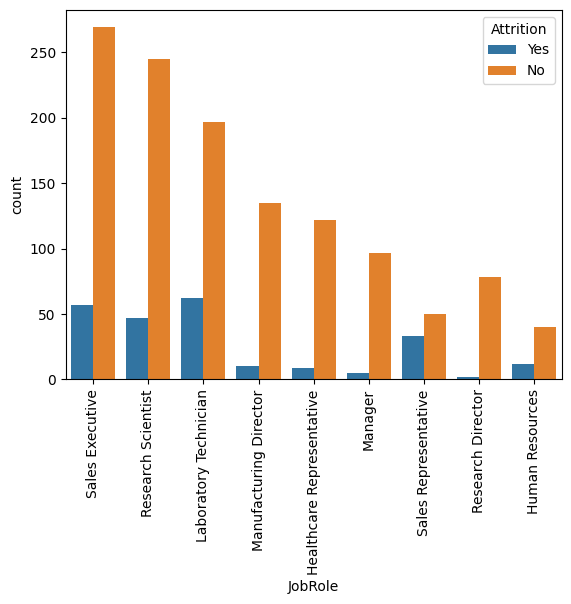

In [ ]:
sns.countplot(data,x='JobRole', hue='Attrition')
plt.xticks(rotation=90)
plt.show()

### Insight
**job role such as sales executive,research scientist,lab technician,sales representatives have high attrition and company need to look into these departments and solve issues faced by them**

### **13) does Job Satisfaction impact attrition**


<Axes: xlabel='JobSatisfaction', ylabel='count'>

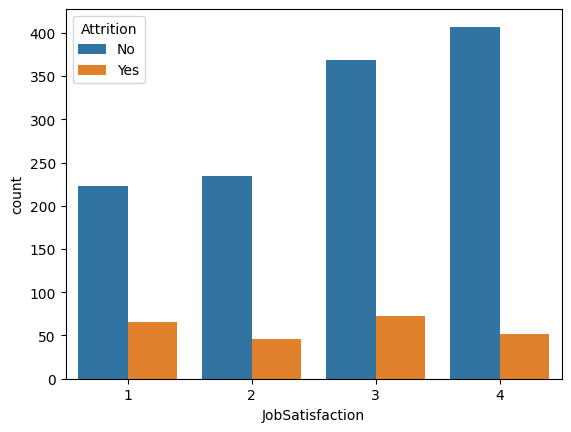

In [ ]:
sns.countplot(data,x='JobSatisfaction', hue='Attrition')

### Insight
1.   Value = 1 → Low Satisfaction
2.   Value = 2 → Medium Satisfaction

1.   Value = 3 → High Satisfaction
2.   Value = 4 → Very High Satisfaction

**Employees with less job satisfaction tend to leave the company compare to the Employees with high satisfaction**

**The attrion in value 3 is also high but many Employyes like to stay than leave**

### **14) How do stock options affect employee loyalty**

<Axes: xlabel='StockOptionLevel', ylabel='count'>

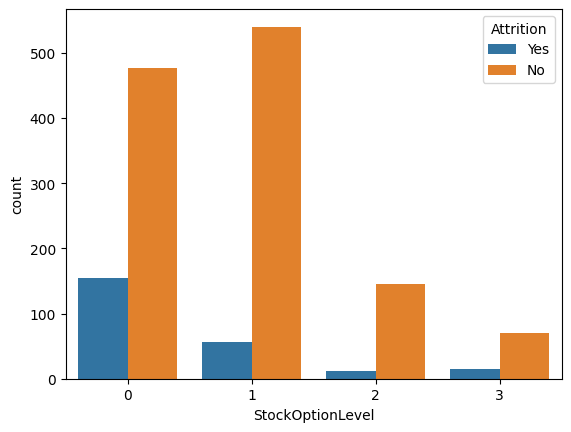

In [ ]:
sns.countplot(data,x='StockOptionLevel', hue='Attrition',)

### Insight
**Employees with Level 0 stock options leave most frequently. Providing even a Level 1 stock option plan significantly reduces attrition.**

### **15) Is attrition higher in the first few years at the company?**

<Axes: xlabel='YearsAtCompany', ylabel='Count'>

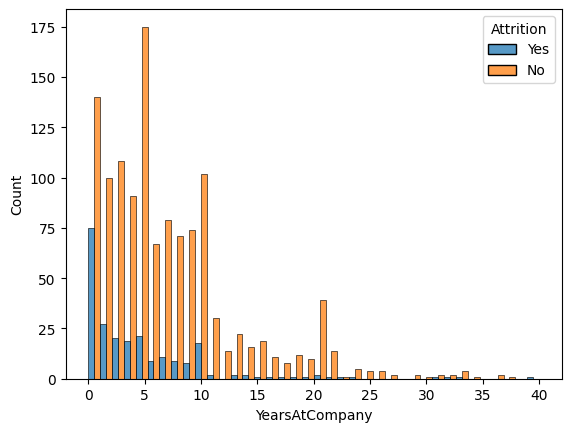

In [ ]:
sns.histplot(data,x='YearsAtCompany', hue='Attrition', multiple="dodge")

### Insight
**Attrition is extremely high in the first 2 years. If an employee stays past year 5, their likelihood of leaving drops significantly.**

### **16) will number of companies worked before result in more attrition**

<Axes: xlabel='NumCompaniesWorked', ylabel='Count'>

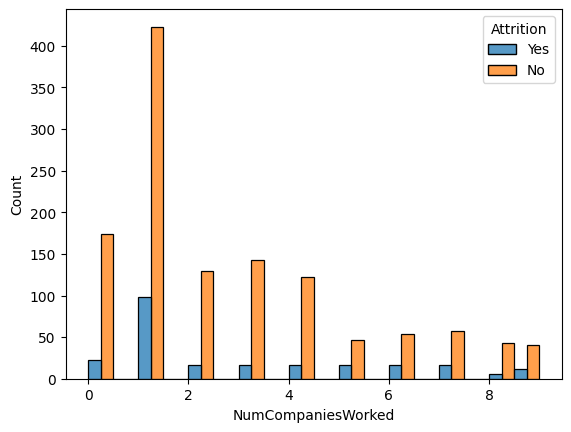

In [ ]:
sns.histplot(data,x='NumCompaniesWorked', hue='Attrition', multiple="dodge")

### Insight
**Employees who worked in one company before join this company leave more compared to others**

### **17) what is the distribution of age**

<Axes: xlabel='Age', ylabel='Count'>

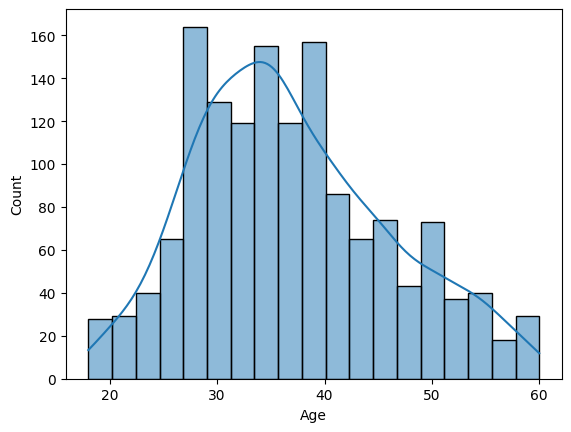

In [ ]:
sns.histplot(data,x='Age',kde=True)

### Insight
**Most of the employees belong to 25-40 age groups**

### **18) what is the distribution of monthly income**

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

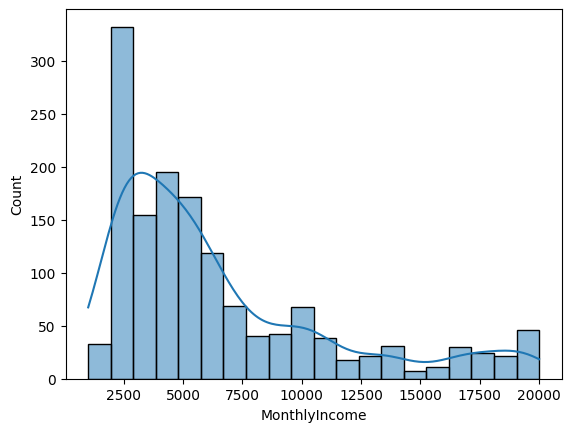

In [ ]:
sns.histplot(data,x='MonthlyIncome',kde=True)

### Insight
**Most employees earn around 2500 to 5000 monthly**

### **19) does salary hike result in more attrition**

<Axes: xlabel='PercentSalaryHike', ylabel='count'>

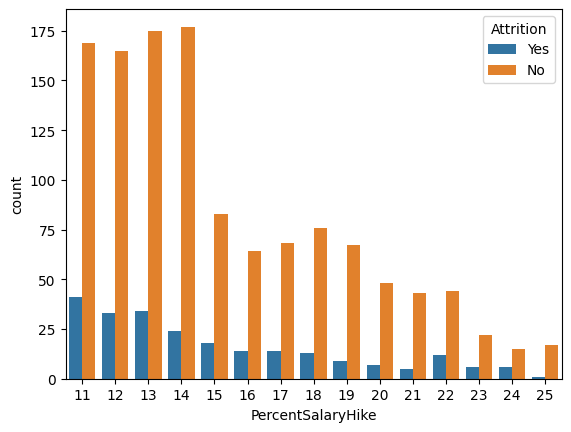

In [ ]:
sns.countplot(data,x='PercentSalaryHike',hue='Attrition')

### Insight
**Employees with less salary hike are more likely to leave**

### **20)does age affect attrition**

<Axes: xlabel='Age', ylabel='Count'>

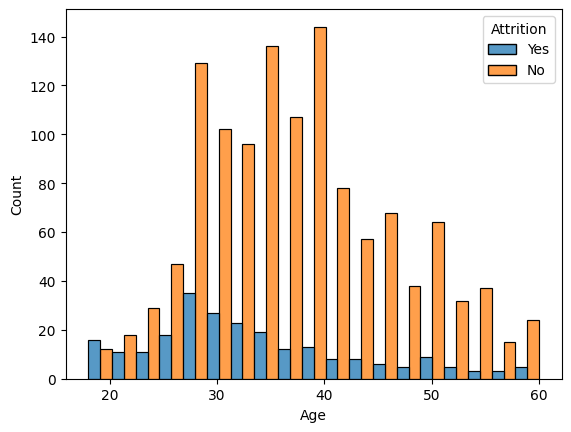

In [ ]:
sns.histplot(data,x='Age',hue='Attrition',multiple='dodge')

### Insight
**Employees of younger age rangig from 25-30 leave more**

### **21)Does  Marital Status affect Attrition**

<Axes: xlabel='MaritalStatus', ylabel='Count'>

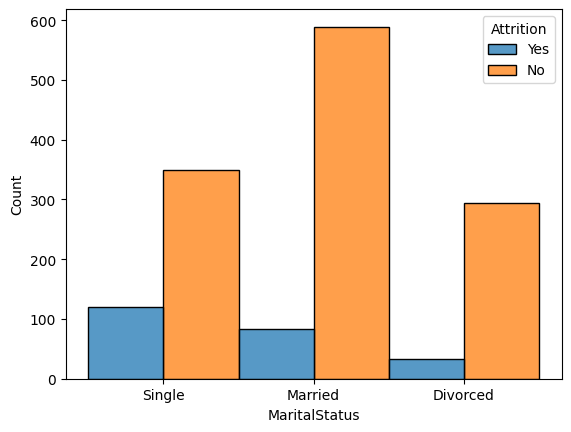

In [ ]:
sns.histplot(data,x='MaritalStatus',hue='Attrition',multiple='dodge')

### Insight
**Employees who are single leave company more than married Employees**

### **22)Does a high Job Involvement keep employees at the company?**

/tmp/ipython-input-1502416376.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.pointplot(x='JobInvolvement', y='Attrition', data=data.replace({'Yes':1, 'No':0}))


<Axes: xlabel='JobInvolvement', ylabel='Attrition'>

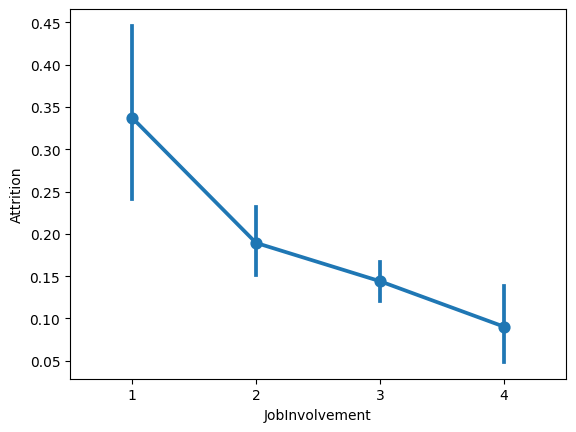

In [ ]:
sns.pointplot(x='JobInvolvement', y='Attrition', data=data.replace({'Yes':1, 'No':0}))

### Insight
**attrition where the employee has job satisfaction 1(very low) has high attrition**

## Conclusion
- Overtime is one of the strongest indicators of attrition.
- Younger and single employees tend to leave more frequently.
- Lower salary groups are more likely to switch jobs.
- Poor work-life balance and low job satisfaction lead to higher attrition.

## Recommendations
- Reduce excessive overtime
- Improve salary structure
- Enhance job satisfaction programs
- Promote healthy work-life balance